# Pregunta  1

In [2]:
%matplotlib inline

(a) Cargue los datos de entrenamiento y pruebas como dataframes de pandas. Describa las variables involucradas en el problema, explorando el tipo de datos de que se trata, el número de valores distintos y, si corresponde, un gráfico (e.g. un histograma) que resuma su comportamiento. Su primera operación de pre-procesamiento de datos será obtener la hora del día desde el campo fecha (que en este momento es de tipo string), creando una nueva columna denominada hour y de tipo int. Para hacer esta operación se concatenarán los dataframes de entrenamiento y pruebas y luego se volverán a separar manteniendo la separación original.

In [3]:
import pandas as pd
import numpy as np
dftrain = pd.read_csv("bike_sharing_train.csv")
dfval = pd.read_csv("bike_sharing_val.csv")
dftest = pd.read_csv("bike_sharing_test.csv")

ntrain = len(dftrain)
nval = len(dftrain) + len(dfval)

df = pd.concat([dftrain,dfval,dftest])

# Se elimina "Unnamed: 0" por que es inutil.
df.drop('Unnamed: 0', axis=1, inplace=True)

df["hour"] = pd.to_datetime(df["datetime"]).apply(lambda x: x.strftime("%H"))
df["hour"] = pd.to_numeric(df["hour"])

df["cday"] = pd.to_datetime(df["datetime"]).dt.dayofweek
df["cday"] = pd.to_numeric(df["cday"])

print("\nSummary - dataframe completo:\n")
print(df.describe())


Summary - dataframe completo:

             season       holiday    workingday       weather         temp  \
count  10886.000000  10886.000000  10886.000000  10886.000000  10886.00000   
mean       2.506614      0.028569      0.680875      1.418427     20.23086   
std        1.116174      0.166599      0.466159      0.633839      7.79159   
min        1.000000      0.000000      0.000000      1.000000      0.82000   
25%        2.000000      0.000000      0.000000      1.000000     13.94000   
50%        3.000000      0.000000      1.000000      1.000000     20.50000   
75%        4.000000      0.000000      1.000000      2.000000     26.24000   
max        4.000000      1.000000      1.000000      4.000000     41.00000   

              atemp      humidity     windspeed        casual    registered  \
count  10886.000000  10886.000000  10886.000000  10886.000000  10886.000000   
mean      23.655084     61.886460     12.799395     36.021955    155.552177   
std        8.474601     19.2

In [4]:
# Separar los conjuntos de entrenamiento y prueba

df_train = df[:ntrain]
df_val = df[ntrain:nval]
df_test = df[nval:]

df_train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,cday
0,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,3,5
1,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,4,5
2,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1,5,5
3,2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0.0000,2,0,2,6,5
4,2011-01-01 07:00:00,1,0,0,1,8.20,12.880,86,0.0000,1,2,3,7,5
5,2011-01-01 09:00:00,1,0,0,1,13.12,17.425,76,0.0000,8,6,14,9,5
6,2011-01-01 14:00:00,1,0,0,2,18.86,22.725,72,19.0012,35,71,106,14,5
7,2011-01-01 16:00:00,1,0,0,2,17.22,21.210,82,19.9995,41,52,93,16,5
8,2011-01-01 17:00:00,1,0,0,2,18.04,21.970,82,19.0012,15,52,67,17,5
9,2011-01-01 18:00:00,1,0,0,3,17.22,21.210,88,16.9979,9,26,35,18,5


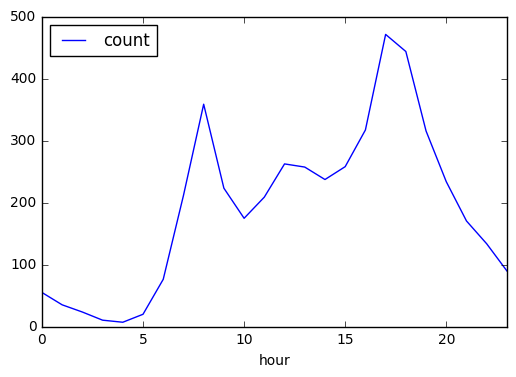

In [5]:
_df = df_train[["hour", "count"]]
_df = _df.groupby("hour")
_df.mean().plot()

In [6]:
df_train.corr()["count"]

season        0.155709
holiday      -0.007696
workingday    0.002929
weather      -0.130732
temp          0.396147
atemp         0.390393
humidity     -0.323679
windspeed     0.112779
casual        0.696385
registered    0.970082
count         1.000000
hour          0.409625
cday          0.000984
Name: count, dtype: float64

Se observa la relación de la cantidad de bicicletas con la hora y la correlación de las distintas variables con la cantidad.

(b) Entrene un árbol de regresión para resolver el problema usando parámetros por defecto. 

In [7]:
# Función de evaluación

def eval_bikemodel(y_predict,y_true):
    diff = np.log(y_predict+1.0) - np.log(y_true+1.0)
    return np.sqrt(np.sum(np.square(diff))/len(y_predict))

In [8]:
columns = ["season","holiday","workingday","weather","temp","atemp", "humidity","windspeed","hour"]

X_train = df_train.ix[:,columns]
Y_train = df_train.ix[:,"count"]

X_val = df_val.ix[:,columns]
Y_val = df_val.ix[:,"count"]

X_test = df_test.ix[:,columns]
Y_test = df_test.ix[:,"count"]

In [9]:
from sklearn.tree import DecisionTreeRegressor as Tree

model = Tree(random_state=0)
model.fit(X_train,Y_train)
score_test = model.score(X_test,Y_test)
print "SCORE TEST=%f"%score_test

SCORE TEST=0.703388


In [10]:
Y_pred_train = model.predict(X_train)
Y_pred_val = model.predict(X_val)
Y_pred_test = model.predict(X_test)

kagg_train = eval_bikemodel(Y_pred_train,Y_train)
kagg_val = eval_bikemodel(Y_pred_val,Y_val)
kagg_test = eval_bikemodel(Y_pred_test,Y_test)

print "KAGG EVAL TRAIN =%f"%kagg_train
print "KAGG EVAL VAL =%f"%kagg_val
print "KAGG EVAL TEST =%f"%kagg_test

KAGG EVAL TRAIN =0.028516
KAGG EVAL VAL =0.554511
KAGG EVAL TEST =0.574239


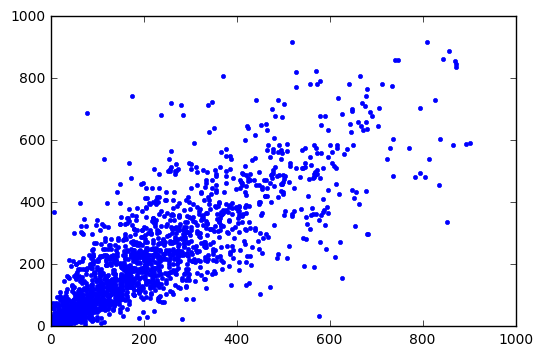

In [11]:
import matplotlib.pyplot as plt

plt.plot(Y_test,Y_pred_test,".")
plt.show()

(c) Mejore el árbol de regresión definido en el punto anterior haciendo modificaciones a los hiper-parámetros
del modelo.

In [12]:
# Se obtiene la máxima profundidad del árbol anterior
max_depth = model.tree_.max_depth
max_depth

28

In [13]:
depth = -1
best_result = 1

for i in range(1, max_depth):
    model = Tree(random_state=0,max_depth=i)
    model.fit(X_train,Y_train)
    
    Y_pred_val = model.predict(X_val)
    kagg_val = eval_bikemodel(Y_pred_val,Y_val)
    
    print "KAGG EVAL VAL for max_depth=%d =%f" % (i, kagg_val)
    
    if kagg_val < best_result:
        best_result = kagg_val
        depth = i

print "\nBest result:\n\tmax_depth=%i\n\tKAGG EVAL=%f" % (depth, best_result)

KAGG EVAL VAL for max_depth=1 =0.979204
KAGG EVAL VAL for max_depth=2 =0.896665
KAGG EVAL VAL for max_depth=3 =0.801210
KAGG EVAL VAL for max_depth=4 =0.728483
KAGG EVAL VAL for max_depth=5 =0.631234
KAGG EVAL VAL for max_depth=6 =0.572753
KAGG EVAL VAL for max_depth=7 =0.550529
KAGG EVAL VAL for max_depth=8 =0.486956
KAGG EVAL VAL for max_depth=9 =0.480482
KAGG EVAL VAL for max_depth=10 =0.476274
KAGG EVAL VAL for max_depth=11 =0.480193
KAGG EVAL VAL for max_depth=12 =0.489915
KAGG EVAL VAL for max_depth=13 =0.503234
KAGG EVAL VAL for max_depth=14 =0.513617
KAGG EVAL VAL for max_depth=15 =0.530887
KAGG EVAL VAL for max_depth=16 =0.535001
KAGG EVAL VAL for max_depth=17 =0.541478
KAGG EVAL VAL for max_depth=18 =0.550662
KAGG EVAL VAL for max_depth=19 =0.552593
KAGG EVAL VAL for max_depth=20 =0.546219
KAGG EVAL VAL for max_depth=21 =0.551071
KAGG EVAL VAL for max_depth=22 =0.553346
KAGG EVAL VAL for max_depth=23 =0.556618
KAGG EVAL VAL for max_depth=24 =0.548437
KAGG EVAL VAL for max_dep

In [14]:
model = Tree(random_state=0, max_depth=depth)
model.fit(X_train,Y_train)

Y_pred_train = model.predict(X_train)
Y_pred_val = model.predict(X_val)
Y_pred_test = model.predict(X_test)

kagg_train = eval_bikemodel(Y_pred_train,Y_train)
kagg_val = eval_bikemodel(Y_pred_val,Y_val)
kagg_test = eval_bikemodel(Y_pred_test,Y_test)

print "KAGG EVAL TRAIN =%f"%kagg_train
print "KAGG EVAL VAL =%f"%kagg_val
print "KAGG EVAL TEST =%f"%kagg_test

KAGG EVAL TRAIN =0.338635
KAGG EVAL VAL =0.476274
KAGG EVAL TEST =0.516396


Se observa que empeora el error de entrenamiento pero disminuye drasticamente el error de prueba. Esto implica que se estaba realizando sobre ajuste con el árbol generado (de profundidad 32 en contra posición del árbol actual de profundidad 10). 

(d) Mejore el árbol de regresión definido en el punto anterior haciendo modificaciones sobre la representación
utilizada para aprender desde los datos.

In [15]:
columns = ["season","holiday","workingday","weather","temp","atemp", "humidity","windspeed","hour", "cday"]

X_train = df_train.ix[:,columns]
Y_train = df_train.ix[:,"count"]

X_val = df_val.ix[:,columns]
Y_val = df_val.ix[:,"count"]

X_test = df_test.ix[:,columns]
Y_test = df_test.ix[:,"count"]

In [16]:
model = Tree(random_state=0, max_depth=depth)
model.fit(X_train,Y_train)

Y_pred_train = model.predict(X_train)
Y_pred_val = model.predict(X_val)
Y_pred_test = model.predict(X_test)

kagg_train = eval_bikemodel(Y_pred_train,Y_train)
kagg_val = eval_bikemodel(Y_pred_val,Y_val)
kagg_test = eval_bikemodel(Y_pred_test,Y_test)

print "KAGG EVAL TRAIN =%f"%kagg_train
print "KAGG EVAL VAL =%f"%kagg_val
print "KAGG EVAL TEST =%f"%kagg_test

KAGG EVAL TRAIN =0.336507
KAGG EVAL VAL =0.466127
KAGG EVAL TEST =0.504512


Se observa una mejora de un 1.2%

(e) Entrene una SVM no lineal para resolver el problema midiendo el efecto de las distintas representaciones
que haya descubierto hasta este punto.

In [17]:
dummies_columns = ["season", "weather","hour","cday"]

columns = ["season","holiday","workingday","weather","temp","atemp", "humidity","windspeed","hour", "cday"]

_df = df.ix[:,columns]

_df = pd.get_dummies(_df,columns=dummies_columns)

In [18]:
X_train = _df[:ntrain]
X_val = _df[ntrain:nval]
X_test = _df[nval:]

In [19]:
from sklearn.preprocessing import StandardScaler
scalerX = StandardScaler()
X_train = scalerX.fit_transform(X_train)
X_val = scalerX.fit_transform(X_val)
X_test = scalerX.transform(X_test)

In [231]:
from sklearn.svm import SVR

model = SVR()
model.fit(X_train,Y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [232]:
Y_pred_train = model.predict(X_train)
Y_pred_val = model.predict(X_val)
Y_pred_test = model.predict(X_test)

In [233]:
kagg_train = eval_bikemodel(Y_pred_train,Y_train)
kagg_val = eval_bikemodel(Y_pred_val,Y_val)
kagg_test = eval_bikemodel(Y_pred_test,Y_test)

print "KAGG EVAL TRAIN =%f"%kagg_train
print "KAGG EVAL VAL =%f"%kagg_val
print "KAGG EVAL TEST =%f"%kagg_test

KAGG EVAL TRAIN =0.980409
KAGG EVAL VAL =0.958149
KAGG EVAL TEST =0.957582


(f) Mejore la SVM definida en el punto anterior haciendo modificaciones a los hiper-parámetros de la máquina

In [244]:
best_result = 1

kernel = ""
C = -1
epsilon

for k in ["linear", "poly", "rbf", "sigmoid"]:
    for i in np.linspace(0.5,10,40):
        for e in np.linspace(0.1,2,20):
            model = SVR(kernel=k, C=i, epsilon=e)
            model.fit(X_train,Y_train)

            Y_pred_val = model.predict(X_val)
            kagg_val = eval_bikemodel(Y_pred_val,Y_val)

            print "KAGG EVAL VAL (kernel=%s, C=%f, epsilon=%f) = %f" % (k, i, e, kagg_val)

            if kagg_val < best_result:
                best_result = kagg_val
                kernel = k
                epsilon = e
                C=i


KAGG EVAL VAL (kernel=linear, C=0.500000, epsilon=0.100000) = 0.694392
KAGG EVAL VAL (kernel=linear, C=0.500000, epsilon=0.200000) = 0.692742
KAGG EVAL VAL (kernel=linear, C=0.500000, epsilon=0.300000) = 0.694389
KAGG EVAL VAL (kernel=linear, C=0.500000, epsilon=0.400000) = 0.694957
KAGG EVAL VAL (kernel=linear, C=0.500000, epsilon=0.500000) = 0.702995
KAGG EVAL VAL (kernel=linear, C=0.500000, epsilon=0.600000) = 0.704530
KAGG EVAL VAL (kernel=linear, C=0.500000, epsilon=0.700000) = 0.705554
KAGG EVAL VAL (kernel=linear, C=0.500000, epsilon=0.800000) = 0.696874
KAGG EVAL VAL (kernel=linear, C=0.500000, epsilon=0.900000) = 0.700418
KAGG EVAL VAL (kernel=linear, C=0.500000, epsilon=1.000000) = 0.700519
KAGG EVAL VAL (kernel=linear, C=0.500000, epsilon=1.100000) = 0.704526
KAGG EVAL VAL (kernel=linear, C=0.500000, epsilon=1.200000) = 0.697805
KAGG EVAL VAL (kernel=linear, C=0.500000, epsilon=1.300000) = 0.692942
KAGG EVAL VAL (kernel=linear, C=0.500000, epsilon=1.400000) = 0.691843
KAGG E

In [255]:
model = SVR(kernel=kernel, C=C, epsilon=epsilon)
model.fit(X_train,Y_train)

SVR(C=10.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.10000000000000001,
  gamma='auto', kernel='poly', max_iter=-1, shrinking=True, tol=0.001,
  verbose=False)

In [1]:
Y_pred_train = model.predict(X_train)
Y_pred_val = model.predict(X_val)
Y_pred_test = model.predict(X_test)

kagg_train = eval_bikemodel(Y_pred_train,Y_train)
kagg_val = eval_bikemodel(Y_pred_val,Y_val)
kagg_test = eval_bikemodel(Y_pred_test,Y_test)

print "KAGG EVAL TRAIN =%f"%kagg_train
print "KAGG EVAL VAL =%f"%kagg_val
print "KAGG EVAL TEST =%f"%kagg_test

NameError: name 'model' is not defined

(g) Evalúe el efecto de utilizar el dataset de validación para entrenamiento y seleccionar los parámetros estructurales del árbol de clasificación y la SVM usando validación cruzada.

In [ ]:
from sklearn import cross_validation

dummies_columns = ["season", "weather","hour","cday"]

columns = ["season","holiday","workingday","weather","temp","atemp", "humidity","windspeed","hour", "cday"]

_df = df.ix[:,columns]
Y_train = df_train.ix[:,"count"].values

_df = pd.get_dummies(_df,columns=dummies_columns)

X_train = _df[:ntrain].values
X_val = _df[ntrain:nval]
X_test = _df[nval:]

k_fold = cross_validation.KFold(len(X_train),10)
score_cv = 0

for k, (train, val) in enumerate(k_fold):
    model = SVR(C=C, kernel=kernel, epsilon=epsilon)
    model.fit(X_train[train], Y_train[train])
    Ypred_val = model.predict(X_train[val])
    Ytrue_val = Y_train[val]
    score_fold = eval_bikemodel(Ypred_val,Ytrue_val)
    score_cv += score_fold

score_cv = score_cv / 10
print "Evalucación con cross-validation:", score_cv

In [ ]:
model = SVR(C=C, kernel=kernel, epsilon=epsilon)
model.fit(X_train, Y_train)
Ypred_val = model.predict(X_val)
Ytrue_val = Y_val

Ypred_test = model.predict(X_test)
Ytrue_test = Y_test

print "Evaluación con conjunto de validación: ", eval_bikemodel(Ypred_val, Ytrue_val)
print "Evaluación con conjunto de prueba: ", eval_bikemodel(Ypred_test, Ytrue_test)

In [ ]:
columns = ["season","holiday","workingday","weather","temp","atemp", "humidity","windspeed","hour", "cday"]

X_train = df_train.ix[:,columns].values
Y_train = df_train.ix[:,"count"].values

X_val = df_val.ix[:,columns]
Y_val = df_val.ix[:,"count"]

X_test = df_test.ix[:,columns]
Y_test = df_test.ix[:,"count"]

k_fold = cross_validation.KFold(len(X_train)-1,10)
score_cv = 0

for k, (train, val) in enumerate(k_fold):
    model = Tree(max_depth=depth)
    model.fit(X_train[train], Y_train[train])
    Ypred_val = model.predict(X_train[val])
    Ytrue_val = Y_train[val]
    score_fold = eval_bikemodel(Ypred_val,Ytrue_val)
    score_cv += score_fold

score_cv = score_cv / 10
print "Evalucación con cross-validation:", score_cv

In [ ]:
model = Tree(max_depth=depth)
model.fit(X_train, Y_train)
Ypred_val = model.predict(X_val)
Ytrue_val = Y_val

Ypred_test = model.predict(X_test)
Ytrue_test = Y_test

print "Evaluación con conjunto de validación: ", eval_bikemodel(Ypred_val, Ytrue_val)
print "Evaluación con conjunto de prueba: ", eval_bikemodel(Ypred_test, Ytrue_test)

Se observa que para este caso da un mejor indicador evaluar en el conjunto de validación que realizar cross-validation.

(h) Evalúe el efecto de utilizar un ensamblado de 2 máquinas de aprendizaje para predecir la demanda
total de bicicletas.

In [20]:
columns = ["season","holiday","workingday","weather","temp","atemp", "humidity","windspeed","hour", "cday"]

X_train = df_train.ix[:,columns]
Y_train = df_train.ix[:,"count"]
Y_train1 = df_train.ix[:,"casual"]
Y_train2 = df_train.ix[:,"registered"]

X_val = df_val.ix[:,columns]
Y_val = df_val.ix[:,"count"]
Y_val1 = df_val.ix[:,"casual"]
Y_val2 = df_val.ix[:,"registered"]

X_test = df_test.ix[:,columns]
Y_test = df_test.ix[:,"count"]
Y_test1 = df_test.ix[:,"casual"]
Y_test2 = df_test.ix[:,"registered"]

In [22]:
model1 = Tree(max_depth=depth)
model1.fit(X_train, Y_train1)

model2 = Tree(max_depth=depth)
model2.fit(X_train, Y_train2)

Y_pred_train = model1.predict(X_train)+model2.predict(X_train)
Y_pred_val = model1.predict(X_val)+model2.predict(X_val)
Y_pred_test = model1.predict(X_test)+model2.predict(X_test)

kagg_train = eval_bikemodel(Y_pred_train,Y_train)
kagg_val = eval_bikemodel(Y_pred_val,Y_val)
kagg_test = eval_bikemodel(Y_pred_test,Y_test)

print "KAGG EVAL TRAIN =%f"%kagg_train
print "KAGG EVAL VAL =%f"%kagg_val
print "KAGG EVAL TEST =%f"%kagg_test

KAGG EVAL TRAIN =0.315358
KAGG EVAL VAL =0.462031
KAGG EVAL TEST =0.474741


Se observa una mejora de casi un 3% realizando una sumatoria de los dos modelos.

(i) Evalúe el efecto de utilizar un algoritmo genérico para ensamblar máquinas de aprendizaje para predecir
la demanda total de bicicletas.

In [ ]:
columns = ["season","holiday","workingday","weather","temp","atemp", "humidity","windspeed","hour", "cday"]

X_train = df_train.ix[:,columns]
Y_train = df_train.ix[:,"count"]
Y_train1 = df_train.ix[:,"casual"]
Y_train2 = df_train.ix[:,"registered"]

X_val = df_val.ix[:,columns]
Y_val = df_val.ix[:,"count"]
Y_val1 = df_val.ix[:,"casual"]
Y_val2 = df_val.ix[:,"registered"]

X_test = df_test.ix[:,columns]
Y_test = df_test.ix[:,"count"]
Y_test1 = df_test.ix[:,"casual"]
Y_test2 = df_test.ix[:,"registered"]

In [25]:
from sklearn.ensemble import RandomForestRegressor

best_result = 1

n_estimators = -1
depth = -1

for d in range(1,32):
    for n in range(1,501,10):
        model1 = RandomForestRegressor(n_estimators=n,max_depth=d,random_state=0)
        model2= RandomForestRegressor(n_estimators=n,max_depth=d,random_state=0)

        model1.fit(X_train,Y_train1)
        model2.fit(X_train,Y_train2)

        Y_pred_val = model1.predict(X_val)+model2.predict(X_val)
        kagg_val = eval_bikemodel(Y_pred_val,Y_val)

        print "KAGG EVAL VAL (n_estimators=%d, depth=%d) = %f" % (n,d, kagg_val)

        if kagg_val < best_result:
            best_result = kagg_val
            depth = d
            n_estimators=n

KAGG EVAL VAL (n_estimators=1, depth=1) = 1.084976
KAGG EVAL VAL (n_estimators=11, depth=1) = 1.044290
KAGG EVAL VAL (n_estimators=21, depth=1) = 1.052527
KAGG EVAL VAL (n_estimators=31, depth=1) = 1.053280
KAGG EVAL VAL (n_estimators=41, depth=1) = 1.045305
KAGG EVAL VAL (n_estimators=51, depth=1) = 1.043942
KAGG EVAL VAL (n_estimators=61, depth=1) = 1.042304
KAGG EVAL VAL (n_estimators=71, depth=1) = 1.045530
KAGG EVAL VAL (n_estimators=81, depth=1) = 1.046671
KAGG EVAL VAL (n_estimators=91, depth=1) = 1.047555
KAGG EVAL VAL (n_estimators=101, depth=1) = 1.046058
KAGG EVAL VAL (n_estimators=111, depth=1) = 1.044866
KAGG EVAL VAL (n_estimators=121, depth=1) = 1.045616
KAGG EVAL VAL (n_estimators=131, depth=1) = 1.045097
KAGG EVAL VAL (n_estimators=141, depth=1) = 1.043253
KAGG EVAL VAL (n_estimators=151, depth=1) = 1.045142
KAGG EVAL VAL (n_estimators=161, depth=1) = 1.045067
KAGG EVAL VAL (n_estimators=171, depth=1) = 1.045277
KAGG EVAL VAL (n_estimators=181, depth=1) = 1.044999
KAGG

In [28]:
model1 = RandomForestRegressor(n_estimators=n_estimators,max_depth=depth,random_state=0)
model2= RandomForestRegressor(n_estimators=n_estimators,max_depth=depth,random_state=0)

model1.fit(X_train,Y_train1)
model2.fit(X_train,Y_train2)

Y_pred_train = model1.predict(X_train)+model2.predict(X_train)
Y_pred_val = model1.predict(X_val)+model2.predict(X_val)
Y_pred_test = model1.predict(X_test)+model2.predict(X_test)

kagg_train = eval_bikemodel(Y_pred_train,Y_train)
kagg_val = eval_bikemodel(Y_pred_val,Y_val)
kagg_test = eval_bikemodel(Y_pred_test,Y_test)

print "KAGG EVAL TRAIN =%f"%kagg_train
print "KAGG EVAL VAL =%f"%kagg_val
print "KAGG EVAL TEST =%f"%kagg_test

ValueError: n_estimators must be greater than zero, got -1.

In [29]:
from sklearn.ensemble import AdaBoostRegressor

best_result = 1

n_estimators = -1
depth = -1

for d in range(1,32):
    for n in range(1,501,10):
        model1 = AdaBoostRegressor(n_estimators=n,base_estimator=Tree(max_depth=d))
        model2= AdaBoostRegressor(n_estimators=n,base_estimator=Tree(max_depth=d))

        model1.fit(X_train,Y_train1)
        model2.fit(X_train,Y_train2)

        Y_pred_val = model1.predict(X_val)+model2.predict(X_val)
        kagg_val = eval_bikemodel(Y_pred_val,Y_val)

        print "KAGG EVAL VAL (n_estimators=%d, depth=%d) = %f" % (n,d, kagg_val)

        if kagg_val < best_result:
            best_result = kagg_val
            depth = d
            n_estimators=n

KAGG EVAL VAL (n_estimators=1, depth=1) = 1.082955
KAGG EVAL VAL (n_estimators=11, depth=1) = 1.137279
KAGG EVAL VAL (n_estimators=21, depth=1) = 1.153978
KAGG EVAL VAL (n_estimators=31, depth=1) = 1.116767
KAGG EVAL VAL (n_estimators=41, depth=1) = 1.139033
KAGG EVAL VAL (n_estimators=51, depth=1) = 1.162557
KAGG EVAL VAL (n_estimators=61, depth=1) = 1.154221
KAGG EVAL VAL (n_estimators=71, depth=1) = 1.134161
KAGG EVAL VAL (n_estimators=81, depth=1) = 1.125802
KAGG EVAL VAL (n_estimators=91, depth=1) = 1.144531
KAGG EVAL VAL (n_estimators=101, depth=1) = 1.167158
KAGG EVAL VAL (n_estimators=111, depth=1) = 1.143930
KAGG EVAL VAL (n_estimators=121, depth=1) = 1.153469
KAGG EVAL VAL (n_estimators=131, depth=1) = 1.159998
KAGG EVAL VAL (n_estimators=141, depth=1) = 1.135581
KAGG EVAL VAL (n_estimators=151, depth=1) = 1.125579
KAGG EVAL VAL (n_estimators=161, depth=1) = 1.131641
KAGG EVAL VAL (n_estimators=171, depth=1) = 1.133480
KAGG EVAL VAL (n_estimators=181, depth=1) = 1.148012
KAGG

In [30]:
model1 = AdaBoostRegressor(n_estimators=n_estimators,base_estimator=Tree(max_depth=depth))
model2= AdaBoostRegressor(n_estimators=n_estimators,base_estimator=Tree(max_depth=depth))

model1.fit(X_train,Y_train1)
model2.fit(X_train,Y_train2)

Y_pred_train = model1.predict(X_train)+model2.predict(X_train)
Y_pred_val = model1.predict(X_val)+model2.predict(X_val)
Y_pred_test = model1.predict(X_test)+model2.predict(X_test)

kagg_train = eval_bikemodel(Y_pred_train,Y_train)
kagg_val = eval_bikemodel(Y_pred_val,Y_val)
kagg_test = eval_bikemodel(Y_pred_test,Y_test)

print "KAGG EVAL TRAIN =%f"%kagg_train
print "KAGG EVAL VAL =%f"%kagg_val
print "KAGG EVAL TEST =%f"%kagg_test

KAGG EVAL TRAIN =0.252072
KAGG EVAL VAL =0.404079
KAGG EVAL TEST =0.441436


(Extra) Se realiza una DNN mediante skflow.

In [58]:
dummies_columns = ["season", "weather","hour","cday"]

columns = ["season","holiday","workingday","weather","temp","atemp", "humidity","windspeed","hour", "cday"]

_df = df.ix[:,columns]

_df = pd.get_dummies(_df,columns=dummies_columns)

X_train = _df[:ntrain]
X_val = _df[ntrain:nval]
X_test = _df[nval:]

from sklearn.preprocessing import StandardScaler
scalerX = StandardScaler()
X_train = scalerX.fit_transform(X_train)
X_val = scalerX.fit_transform(X_val)
X_test = scalerX.transform(X_test)

In [59]:
import tensorflow as tf
from tensorflow.contrib import learn

In [68]:
tf.logging.set_verbosity(tf.logging.INFO)

feature_columns = learn.infer_real_valued_columns_from_input(X_train)

model = learn.DNNRegressor(feature_columns=feature_columns, hidden_units=[14, 10, 7, 3], model_dir="./model")
model.fit(X_train, Y_train, steps=2000)

INFO:tensorflow:Using config: {'task': 0, 'save_summary_steps': 100, 'keep_checkpoint_max': 5, 'save_checkpoints_secs': 60, 'tf_config': intra_op_parallelism_threads: 4
inter_op_parallelism_threads: 4
gpu_options {
  per_process_gpu_memory_fraction: 1
}
, 'master': '', 'keep_checkpoint_every_n_hours': 10000, 'tf_random_seed': 42, 'num_ps_replicas': 0}
INFO:tensorflow:Transforming feature_column _RealValuedColumn(column_name='', dimension=45, default_value=None, dtype=tf.float64)
INFO:tensorflow:Create CheckpointSaver
INFO:tensorflow:Restored model from ./model/model.ckpt-2000-?????-of-00001
INFO:tensorflow:Step 2001: loss = 4415.63
INFO:tensorflow:Saving checkpoints for 2001 into ./model/model.ckpt.
INFO:tensorflow:Step 2101: loss = 4403.96
INFO:tensorflow:Step 2201: loss = 4392.09
INFO:tensorflow:Step 2301: loss = 4379.41
INFO:tensorflow:Step 2401: loss = 4366.23
INFO:tensorflow:Step 2501: loss = 4354.94
INFO:tensorflow:Step 2601: loss = 4344.66
INFO:tensorflow:Step 2701: loss = 4333.

DNNRegressor(hidden_units=[14, 10, 7, 3], dropout=None, optimizer=None, feature_columns=[_RealValuedColumn(column_name='', dimension=45, default_value=None, dtype=tf.float64)])

In [69]:
Y_pred_train = model.predict(X_train)
Y_pred_val = model.predict(X_val)
Y_pred_test = model.predict(X_test)

kagg_train = eval_bikemodel(Y_pred_train,Y_train)
kagg_val = eval_bikemodel(Y_pred_val,Y_val)
kagg_test = eval_bikemodel(Y_pred_test,Y_test)

print "KAGG EVAL TRAIN =%f"%kagg_train
print "KAGG EVAL VAL =%f"%kagg_val
print "KAGG EVAL TEST =%f"%kagg_test

INFO:tensorflow:Transforming feature_column _RealValuedColumn(column_name='', dimension=45, default_value=None, dtype=tf.float64)
INFO:tensorflow:Loading model from checkpoint: ./model/model.ckpt-4000-?????-of-00001.
INFO:tensorflow:Transforming feature_column _RealValuedColumn(column_name='', dimension=45, default_value=None, dtype=tf.float64)
INFO:tensorflow:Loading model from checkpoint: ./model/model.ckpt-4000-?????-of-00001.
INFO:tensorflow:Transforming feature_column _RealValuedColumn(column_name='', dimension=45, default_value=None, dtype=tf.float64)
INFO:tensorflow:Loading model from checkpoint: ./model/model.ckpt-4000-?????-of-00001.


KAGG EVAL TRAIN =0.515920
KAGG EVAL VAL =0.540257
KAGG EVAL TEST =0.559755
